# Breast Cancer Classification using K-Nearest Neighbors (KNN)

This project focuses on classifying breast tumors as benign or malignant using machine learning techniques.


## Problem Statement
The objective of this case study is to build a machine learning model that can accurately classify breast tumors as **benign** or **malignant** based on diagnostic features extracted from medical images. Early and accurate classification is crucial for effective treatment and improved patient outcomes.


## 1. Loading the dataset and Labeling

In [1]:
import numpy as np
import pandas as pd

In [22]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 📁 Dataset Description
The dataset used in this project is the **Breast Cancer Wisconsin (Diagnostic) Dataset**.  
It consists of **569 samples** with **30 numerical features** computed from digitized images of fine needle aspirates (FNA) of breast masses. These features describe characteristics such as radius, texture, perimeter, area, smoothness, and concavity of cell nuclei.


- removing unnecessary column

In [23]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2.Understanding the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

- in our data set
- there are total 31 columns and 569 rows
- we have 1 categorical  column and 30 numerical column in our data set


- Checking for missing values

In [7]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- There is no missing value in the data set

- checking for duplicate

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


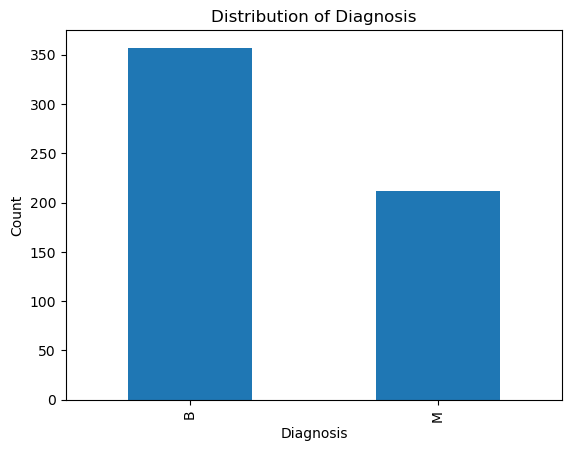

In [14]:

import matplotlib.pyplot as plt



plt.figure()
df["diagnosis"].value_counts().plot(kind="bar")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Diagnosis")
plt.show()


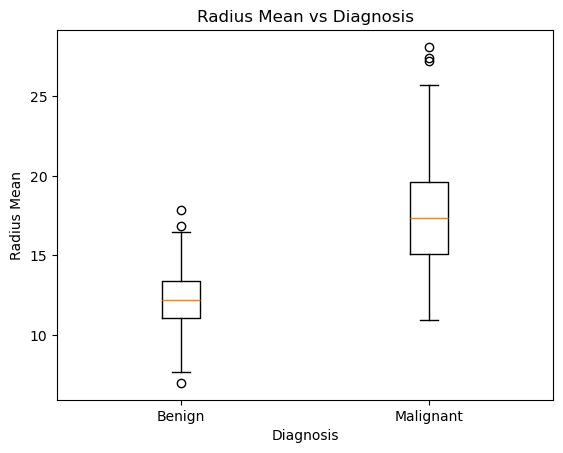

In [15]:
plt.figure()
plt.boxplot(
    [df[df["diagnosis"] == "B"]["radius_mean"],
     df[df["diagnosis"] == "M"]["radius_mean"]],
    labels=["Benign", "Malignant"]
)
plt.xlabel("Diagnosis")
plt.ylabel("Radius Mean")
plt.title("Radius Mean vs Diagnosis")
plt.show()


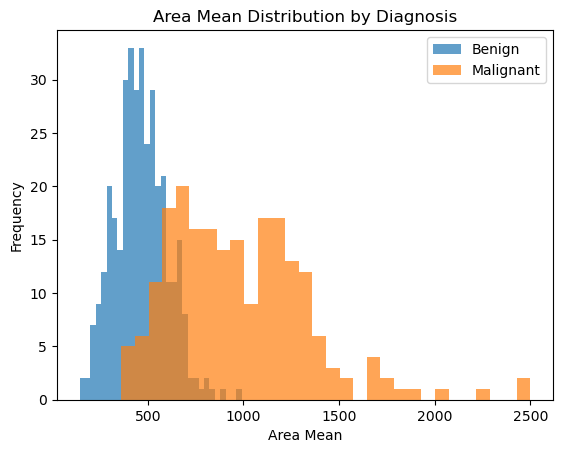

In [19]:
plt.figure()
plt.hist(df[df["diagnosis"]=="B"]["area_mean"], bins=30, alpha=0.7, label="Benign")
plt.hist(df[df["diagnosis"]=="M"]["area_mean"], bins=30, alpha=0.7, label="Malignant")
plt.xlabel("Area Mean")
plt.ylabel("Frequency")
plt.title("Area Mean Distribution by Diagnosis")
plt.legend()
plt.show()


## Building model

## 🎯 Target Variable
The target variable is **`diagnosis`**, which represents the type of breast tumor:
- **B** → Benign  
- **M** → Malignant  

This variable is used to train a supervised classification model.


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=2)

In [25]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.22640,0.1326,0.10480,0.2250,0.08321
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.3865,0.17080,0.3193,0.09221
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.4646,0.20130,0.4432,0.10860
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.26980,0.4023,0.14240,0.2964,0.09606


In [26]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
528,13.940,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.066150,0.1976,0.06457,...,14.62,15.38,94.52,653.3,0.1394,0.1364,0.15590,0.1015,0.2160,0.07253
291,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.1313,0.3030,0.18040,0.1489,0.2962,0.08472
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.0250,0.3057,0.07875
108,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.96080,0.2910,0.4055,0.09789
340,14.420,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.042230,0.1912,0.06412,...,16.67,21.51,111.40,862.1,0.1294,0.3371,0.37550,0.1414,0.3053,0.08764


In [28]:
X_train.shape

(455, 30)

In [30]:
X_test.shape

(114, 30)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

## Model creation

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Model evaluation

In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [44]:
y_pred = knn.predict(X_test)

In [45]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[69  0]
 [ 1 44]]
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        69
           M       1.00      0.98      0.99        45

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy: 0.9912280701754386


### 📊 Model Evaluation Summary

The **K-Nearest Neighbors (KNN)** classifier achieved an accuracy of **99.12%** on the test dataset.  
Precision, recall, and F1-score for both **benign** and **malignant** classes are approximately **0.99**, indicating strong class separation.

Only **one malignant case** was misclassified, which is critical in medical diagnosis and demonstrates the model’s **high reliability** and effectiveness for classification tasks.



##  Conclusion
In this case study, a **K-Nearest Neighbors (KNN)** classifier was developed to classify breast cancer tumors.  
The model achieved **high accuracy and strong class separation**, with minimal misclassification of malignant cases. These results indicate that machine learning can be effectively applied to assist in medical diagnosis and support early detection of breast cancer.
